**Домашнее задание**

Посчитать tpr и fpr в ноутбуке с лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Поcтроить график Precision - Recall на этих же данных.

# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [5]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [6]:
Y = data['affair']

In [7]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [9]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [10]:
predictions = model.predict_proba(X_test)

In [11]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [12]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [13]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


### Оценка качества модели

Считаем accuracy последней модели

In [14]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [15]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7204188481675393

In [16]:
precision = tp / (tp + fp)
precision

0.5681233933161953

In [17]:
recall = tp / (tp + fn)
recall

0.37649063032367974

### Используем готовые библиотеки

In [18]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [19]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [20]:
# # посмотрим что получилось
# for line in zip( pr, re, thres ):
#     print( line )

In [21]:
from sklearn.metrics import average_precision_score

In [22]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5370782474582139

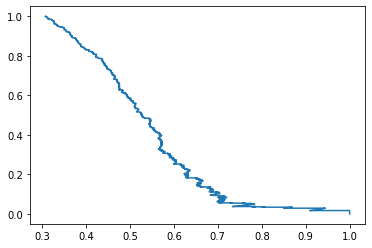

In [23]:
plt.plot(pr, re)
plt.show()

### Считаем вручную

In [24]:
def get_precision_recall_curve(Y_test, Y_pred): # для отличий в названиях добавлено get_
    #ths = sorted(list(set(Y_pred)))
    ths = np.linspace(0, 1, len(Y_pred))
    precisions = []
    recalls = []
    tresholds = []
    
    for treshold in ths:
        # вычисляем матрицу ошибок
        tp = 0 # True positive
        fp = 0 # False positive
        fn = 0 # False negative
        tn = 0 # True negative
        for predicted_prob, actual in zip(Y_pred, Y_test):    
            if predicted_prob >= treshold:
                predicted = 1
            else:
                predicted = 0

            if predicted == 1:
                if actual == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if actual == 1:
                    fn += 1
                else:
                    tn += 1
        
        # вычисляем precision и recall
        if (tp + fp) != 0 and (tp + fn) != 0:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            precisions.append(precision)
            recalls.append(recall)
            tresholds.append(treshold)
    
    return precisions, recalls, tresholds

In [25]:
def get_roc_curve(Y_test, Y_pred): # для отличий в названиях добавлено get_
    #ths = sorted(list(set(Y_pred)), reverse=True)
    ths = np.linspace(0, 1, len(Y_pred))
    fprs = []
    tprs = []
    tresholds = []
    
    for treshold in ths:
        # вычисляем матрицу ошибок
        tp = 0 # True positive
        fp = 0 # False positive
        fn = 0 # False negative
        tn = 0 # True negative
        for predicted_prob, actual in zip(Y_pred, Y_test):    
            if predicted_prob >= treshold:
                predicted = 1
            else:
                predicted = 0

            if predicted == 1:
                if actual == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if actual == 1:
                    fn += 1
                else:
                    tn += 1
        
        # вычисляем fpr и tpr
        if (fp + tn) != 0 and (tp + fn) != 0:
            fpr = fp / (fp + tn)
            tpr = tp / (tp + fn)
            fprs.append(fpr)
            tprs.append(tpr)
            tresholds.append(treshold)
    
    return fprs, tprs, tresholds

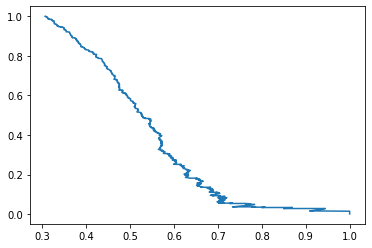

In [26]:
# Внимание: не перезапускайте эту ячейку, если были выполнены ячейки ниже.
# Значения predictions и Y_test будут затерты значениями ниже.
precisions, recalls, tresholds = get_precision_recall_curve(Y_test, predictions[:, 1])

plt.plot(precisions, recalls)
plt.show()

### Используем готовые библиотеки

### ROC

In [27]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [28]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [29]:
# # посмотрим что получилось
# for line in zip( fpr, tpr, thres ):
#     print( line )

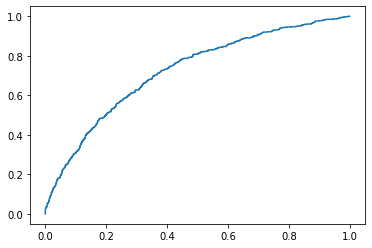

In [30]:
plt.plot( fpr, tpr )
plt.show()

### Считаем вручную

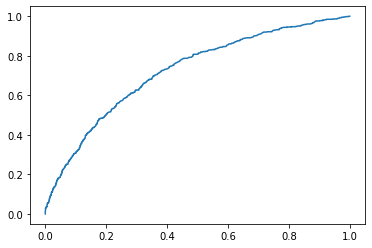

In [31]:
# Внимание: не перезапускайте эту ячейку, если были выполнены ячейки ниже.
# Значения predictions и Y_test будут затерты значениями ниже.
false_positive_rate, true_positive_rate, tresholds = get_roc_curve(Y_test, predictions[:, 1])

plt.plot(false_positive_rate, true_positive_rate)
plt.show()

**Построим еще одну модель и сравним их между собой**

In [32]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [33]:
model2 = LogisticRegression()

In [34]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [35]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
predictions2 = model2.predict_proba( X_test_short )

In [37]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

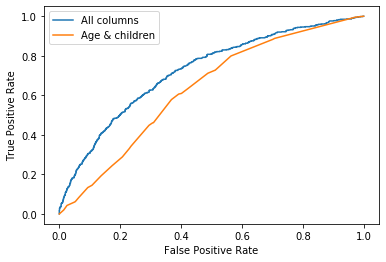

In [38]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

### Считаем вручную

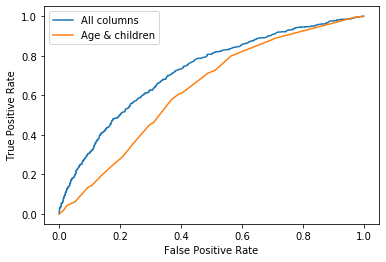

In [39]:
# Внимание: не перезапускайте эту ячейку, если были выполнены ячейки ниже.
# Значения predictions2 и Y_test будут затерты значениями ниже.
false_positive_rate2, true_positive_rate2, tresholds2 = get_roc_curve(Y_test, predictions2[:, 1])

plt.plot( false_positive_rate, true_positive_rate, label = 'All columns' )
plt.plot( false_positive_rate2, true_positive_rate2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [40]:
from sklearn.metrics import roc_curve

In [41]:
from sklearn.metrics import roc_auc_score

In [42]:
roc_auc_score( Y_test, predictions[:, 1] )

0.5141550167462996

In [43]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [44]:
from sklearn.metrics import auc

In [45]:
auc( fpr, tpr )

0.7225943566902437

In [46]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [47]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [48]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [49]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [50]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

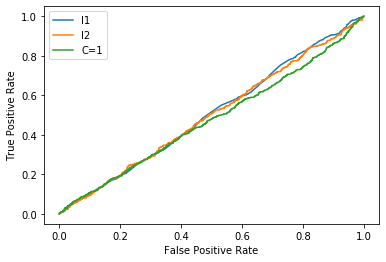

In [51]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

### Считаем вручную

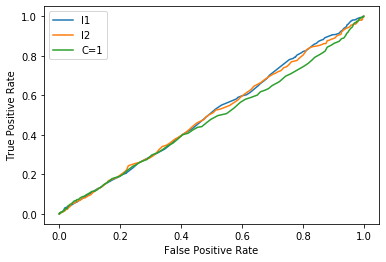

In [52]:
# Внимание: не перезапускайте эту ячейку, если были выполнены ячейки ниже.
# Значения predictions, predictions2, predictions3 и Y_test будут затерты значениями ниже.
false_positive_rate, true_positive_rate, tresholds = get_roc_curve(Y_test, predictions[:, 1])
false_positive_rate2, true_positive_rate2, tresholds2 = get_roc_curve(Y_test, predictions2[:, 1])
false_positive_rate3, true_positive_rate3, tresholds3 = get_roc_curve(Y_test, predictions3[:, 1])

plt.plot(false_positive_rate, true_positive_rate, label = 'l1')
plt.plot(false_positive_rate2, true_positive_rate2, label = 'l2')
plt.plot(false_positive_rate3, true_positive_rate3, label = 'C=1')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [53]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [54]:
Y = data['affair']

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [56]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [57]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [58]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

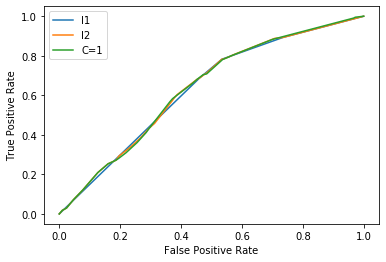

In [59]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

### Считаем вручную

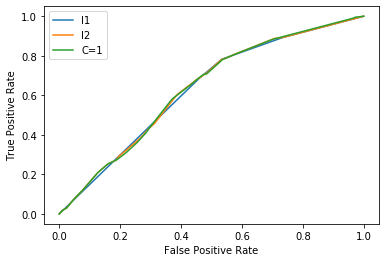

In [60]:
# Внимание: не перезапускайте эту ячейку, если были выполнены ячейки ниже.
# Значения predictions, predictions2, predictions3 и Y_test будут затерты значениями ниже.
false_positive_rate, true_positive_rate, tresholds = get_roc_curve(Y_test, predictions[:, 1])
false_positive_rate2, true_positive_rate2, tresholds2 = get_roc_curve(Y_test, predictions2[:, 1])
false_positive_rate3, true_positive_rate3, tresholds3 = get_roc_curve(Y_test, predictions3[:, 1])

plt.plot(false_positive_rate, true_positive_rate, label = 'l1')
plt.plot(false_positive_rate2, true_positive_rate2, label = 'l2')
plt.plot(false_positive_rate3, true_positive_rate3, label = 'C=1')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()